In [1]:
#Import and read data from github
import pandas as pd
link='https://raw.githubusercontent.com/maomaohenmao/data/master/small_donations_data.csv'
donor = pd.read_csv(link)

In [2]:
#take a look at the data of all the columns and several rows
donor.head()

id  report_number origin    filer_id                 type  \
0  4924154.rcpt      100670216     C3  MACED  592            Candidate   
1  5265339.rcpt      100722381     C3  APPLS  370            Candidate   
2  4476891.rcpt      100596549     C3  JUSTFA 507  Political Committee   
3  4567569.rcpt      100612601     C3  WASHCV 145  Political Committee   
4  2997493.rcpt      100380393     C4  BUNKR2 391            Candidate   

                               filer_name first_name middle_initial  \
0                          MACEWEN DREW C       DREW              C   
1                       APPLETON SHERRY V     SHERRY              V   
2  WA ST ASSN FOR JUSTICE JUSTICE FOR ALL        NaN            NaN   
3      WA CONSERVATION VOTERS ACTION FUND        NaN            NaN   
4                      BUNK RAYMOND R III    RAYMOND              R   

                                last_name                office  \
0                                 MACEWEN  STATE REPRESENTATIVE   
1                                APPLETON  STATE REPRESENTATIVE   
2  WA ST ASSN FOR JUSTICE JUSTICE FOR ALL                   NaN   
3      WA CONSERVATION VOTERS ACTION FUND                   NaN   
4                                    BUNK         STATE SENATOR   

            ...                        contributor_address contributor_city  \
0           ...                        410 E PICKERING RD.          SHELTON   
1           ...                1155 N STATE ST., SUITE 316       BELLINGHAM   
2           ...                    1030 N CENTER PKWY #208        KENNEWICK   
3           ...                      2607 WESTERN AVE #601          SEATTLE   
4           ...            20825 STATE ROUTE 410 EAST #416      BONNEY LAKE   

  contributor_state  contributor_zip   contributor_occupation  \
0                WA            98584                      NaN   
1                WA            98225                      NaN   
2                WA            99336                 ATTORNEY   
3                WA            98121                      NaN   
4                WA            98391  LAW ENFORCEMENT OFFICER   

       contributor_employer_name contributor_employer_city  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2  GIERTH-EDDY LAW OFFICES, PLLC                 KENNEWICK   
3                            NaN                       NaN   
4  FEDERAL WAY POLICE DEPARTMENT               FEDERAL WAY   

  contributor_employer_state  \
0                        NaN   
1                        NaN   
2                         WA   
3                        NaN   
4                         WA   

                                                 url    contributor_location  
0  View report (http://web.pdc.wa.gov/rptimg/defa...  (47.27572, -122.96448)  
1  View report (http://web.pdc.wa.gov/rptimg/defa...  (48.74694, -122.47985)  
2  View report (http://web.pdc.wa.gov/rptimg/defa...   (46.2216, -119.23016)  
3  View report (http://web.pdc.wa.gov/rptimg/defa...  (47.61462, -122.35099)  
4  View report (http://web.pdc.wa.gov/rptimg/defa...   (47.17704, -122.1865)  

[5 rows x 37 columns]

In [3]:
#take a look at the type of columns
donor.dtypes

id                             object
report_number                   int64
origin                         object
filer_id                       object
type                           object
filer_name                     object
first_name                     object
middle_initial                 object
last_name                      object
office                         object
legislative_district          float64
position                       object
party                          object
ballot_number                 float64
for_or_against                 object
jurisdiction                   object
jurisdiction_county            object
jurisdiction_type              object
election_year                   int64
amount                        float64
cash_or_in_kind                object
receipt_date                   object
description                    object
memo                           object
primary_general                object
code                           object
contributor_

In [4]:
#convert the type of several variables of interests (from object to category or ordinal category)
donor['contributor_city']= donor['contributor_city'].astype('category')

In [5]:
donor['party']= donor['party'].astype('category')

In [6]:
donor['primary_general']=donor['primary_general'].astype('category')

In [7]:
donor['type']= donor['type'].astype('category')

In [8]:
# select the variables of interests
donorsmall= donor[['contributor_state','contributor_zip','amount','contributor_city','party','type','primary_general']]

In [9]:
#take a look at the columns of new dataset
donorsmall.head()

contributor_state  contributor_zip   amount contributor_city       party  \
0                WA            98584    20.00          SHELTON  REPUBLICAN   
1                WA            98225  1000.00       BELLINGHAM    DEMOCRAT   
2                WA            99336    30.00        KENNEWICK         NaN   
3                WA            98121    50.00          SEATTLE         NaN   
4                WA            98391   164.17      BONNEY LAKE    DEMOCRAT   

                  type      primary_general  
0            Candidate              Primary  
1            Candidate              General  
2  Political Committee  Full election cycle  
3  Political Committee  Full election cycle  
4            Candidate              Primary

In [10]:
donorsmall.dtypes

contributor_state      object
contributor_zip         int64
amount                float64
contributor_city     category
party                category
type                 category
primary_general      category
dtype: object

In [11]:
#descriptive statistics of column 'amount'
donorsmall['amount'].describe()

count      9491.000000
mean        255.749095
std        2957.761253
min           0.000000
25%          10.000000
50%          35.000000
75%         100.000000
max      122649.590000
Name: amount, dtype: float64

In [12]:
donorsmall['amount'].skew()

28.83004919749561

In [13]:
donorsmall['amount'].kurt()

937.0785212506598

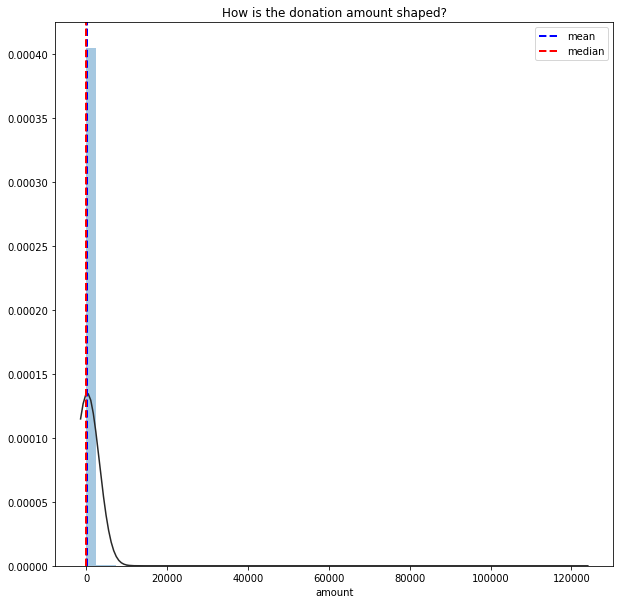

In [16]:
# a simple plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mnVar=donorsmall['amount'].mean()
mdVar=donorsmall['amount'].median()
plt.figure(figsize=(10,10))
sns.distplot(donorsmall['amount'].dropna(),kde=False,fit=norm)
plt.title('How is the donation amount shaped?')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [17]:
#descriptive statistics of column 'contributor_city'
donorsmall['contributor_city'].dtypes

CategoricalDtype(categories=['ABERDEEN', 'ACME', 'ADDY', 'AIRWAY HEIGHTS', 'ALBUQUERQUE',
                  'ALEXANDRIA', 'ALGONA', 'ALLYN', 'ALMIRA', 'AMBLER',
                  ...
                  'WOODINVILLE', 'WOODLAND', 'WOODSIDE', 'WOODWAY', 'YACOLT',
                  'YAKIMA', 'YARDLEY', 'YARROW POINT', 'YELM', 'ZILLAH'],
                 ordered=False)

In [18]:
donorsmall['contributor_city'].describe()

count        9491
unique        718
top       SEATTLE
freq         1790
Name: contributor_city, dtype: object

In [19]:
#descriptive statistics of column 'primary_general'
donorsmall['primary_general'].value_counts()

Full election cycle    6248
Primary                1985
General                1258
Name: primary_general, dtype: int64

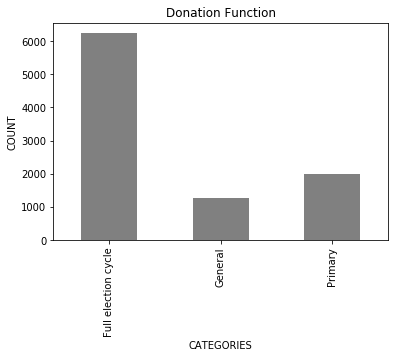

In [20]:
# a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['primary_general'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Function")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [21]:
#descriptive statistics of column 'party'
donorsmall['party'].describe()

count         3680
unique           6
top       DEMOCRAT
freq          1366
Name: party, dtype: object

In [22]:
donorsmall['party'].value_counts()

DEMOCRAT        1366
REPUBLICAN      1148
NON PARTISAN    1090
OTHER             38
NONE              35
INDEPENDENT        3
Name: party, dtype: int64

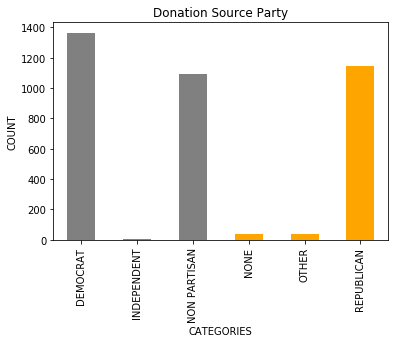

In [23]:
#a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['party'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source Party")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [24]:
#drop the rows whose party is 'none'
byeCategories=['NONE']
donorDRI=donorsmall[~donorsmall.party.isin(byeCategories)].copy()

In [25]:
#again, a look of the new dataset
donorDRI.head()

contributor_state  contributor_zip   amount contributor_city       party  \
0                WA            98584    20.00          SHELTON  REPUBLICAN   
1                WA            98225  1000.00       BELLINGHAM    DEMOCRAT   
2                WA            99336    30.00        KENNEWICK         NaN   
3                WA            98121    50.00          SEATTLE         NaN   
4                WA            98391   164.17      BONNEY LAKE    DEMOCRAT   

                  type      primary_general  
0            Candidate              Primary  
1            Candidate              General  
2  Political Committee  Full election cycle  
3  Political Committee  Full election cycle  
4            Candidate              Primary

In [26]:
#a pivot table of party and primay_general
pd.pivot_table(donorDRI, values='amount',index='primary_general',columns='party', aggfunc='mean')

party                  DEMOCRAT  INDEPENDENT  NON PARTISAN        OTHER  \
primary_general                                                           
Full election cycle  111.891500        108.5    170.656211    54.266667   
General              269.072911          NaN    207.928530   183.000000   
Primary              210.884613        250.0    192.544473  1785.769231   

party                REPUBLICAN  
primary_general                  
Full election cycle  149.010714  
General              362.629145  
Primary              224.178698

In [27]:
#select all the donation happen in seattle
seattle = donorDRI[(donorDRI.contributor_city=='SEATTLE')]

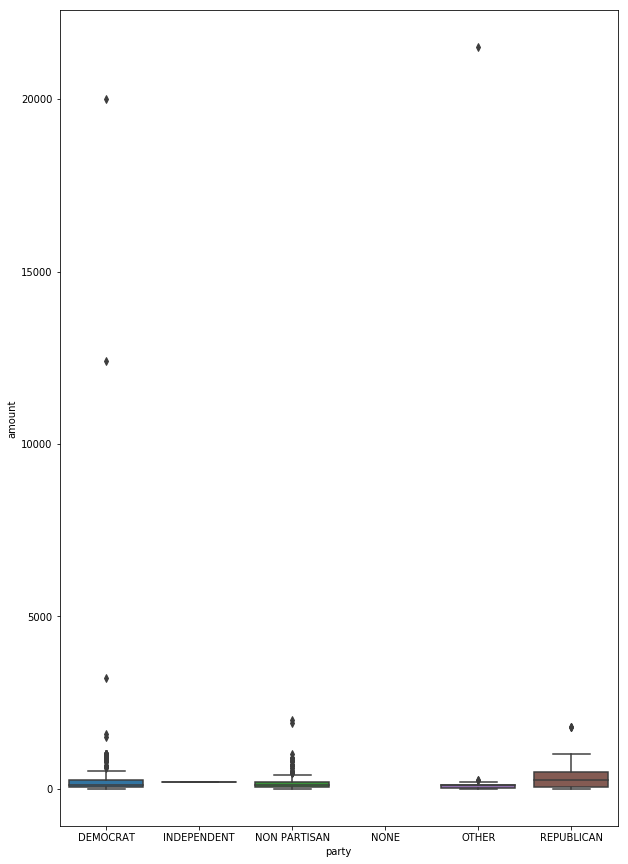

In [28]:
#a box plot to find outliers of the donation of different party
plt.figure(figsize=(10,15))
sns.boxplot(x="party", y="amount", data=seattle)

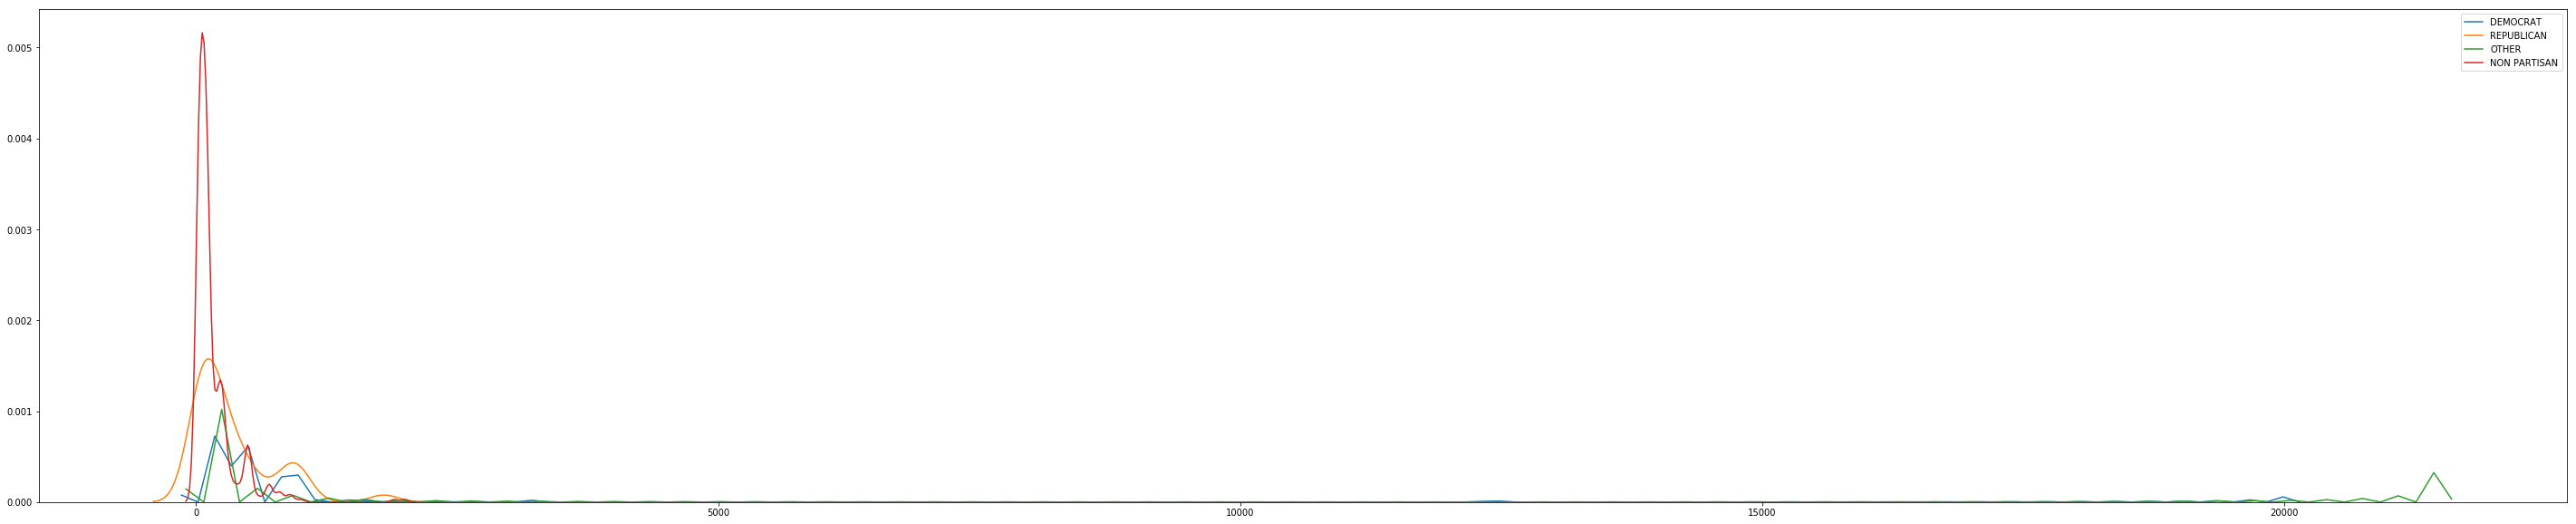

In [29]:
#a kdeplot of donation amout of different party
plt.figure(figsize=(50,10))
sns.kdeplot(seattle[seattle.party=='DEMOCRAT'].amount, label="DEMOCRAT")
sns.kdeplot(seattle[seattle.party=='REPUBLICAN'].amount, label="REPUBLICAN")
sns.kdeplot(seattle[seattle.party=='OTHER'].amount, label="OTHER")
sns.kdeplot(seattle[seattle.party=='NON PARTISAN'].amount, label="NON PARTISAN")
plt.legend();

In [30]:
#drop na in donorDRI for further preparation
donorDRI.dropna(inplace=True)

In [31]:
#since we figure out that we have prominent outliers,  we should use Robuset linear Model Regression
#regress amount with party, type and primary_general
#with the base as independent party, political committee type and primary use
from statsmodels.robust.robust_linear_model import RLM

formula='amount ~ C(party, Treatment("INDEPENDENT"))+ C(type, Treatment("Political Committee"))+ C(primary_general, Treatment("Primary"))'
LinRegR_catX = RLM.from_formula(formula, donorDRI).fit()
print(LinRegR_catX.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 amount   No. Observations:                 3645
Model:                            RLM   Df Residuals:                     3638
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 20 Feb 2018                                         
Time:                        08:40:09                                         
No. Iterations:                    50                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [32]:
#a simpler result of the regression
pd.concat({'Coefficients':LinRegR_catX.params,
           'Significant?':LinRegR_catX.pvalues<0.05},axis=1)

Coefficients  Significant?
Intercept                                           8.580305e+01         False
C(party, Treatment("INDEPENDENT"))[T.DEMOCRAT]     -5.278514e+01         False
C(party, Treatment("INDEPENDENT"))[T.NON PARTISAN] -4.437050e+01         False
C(party, Treatment("INDEPENDENT"))[T.NONE]         -3.022552e-13         False
C(party, Treatment("INDEPENDENT"))[T.OTHER]        -6.774446e+01         False
C(party, Treatment("INDEPENDENT"))[T.REPUBLICAN]   -4.797225e+01         False
C(type, Treatment("Political Committee"))[T.Can...  8.580305e+01         False
C(primary_general, Treatment("Primary"))[T.Full... -2.390914e+01          True
C(primary_general, Treatment("Primary"))[T.Gene...  1.841212e+01          True

In [33]:
#create the link of map of use
compressedMap= 'https://github.com/maomaohenmao/data/raw/master/WAmap.zip'

In [34]:
#read the map as .zip file
import geopandas as gpd


wazipMap = gpd.GeoDataFrame.from_file(compressedMap)

In [35]:
#take a look at the dataframe of the map
wazipMap.head()

OBJECTID ZCTA5CE10  GEOID10 MTFCC10 FUNCSTAT10 PARTFLG10  INTPTLON10  \
0         1     98001  5398001   G6350          S         N -122.264469   
1         2     98002  5398002   G6350          S         N -122.216812   
2         3     98003  5398003   G6350          S         N -122.315773   
3         4     98004  5398004   G6350          S         N -122.205341   
4         5     98005  5398005   G6350          S         N -122.168798   

   INTPTLAT10            Version    POP2000  \
0   47.309496  September 6, 2017  26119.972   
1   47.308286  September 6, 2017  30243.492   
2   47.307713  September 6, 2017  41999.105   
3   47.618337  September 6, 2017  22265.887   
4   47.614533  September 6, 2017  16718.517   

                         ...                            OHU2011    OHU2012  \
0                        ...                          10723.190  10736.519   
1                        ...                          12568.511  12582.972   
2                        ...                          17260.208  17261.814   
3                        ...                          13996.078  14474.941   
4                        ...                           7545.571   7597.664   

     OHU2013    OHU2014    OHU2015    OHU2016    OHU2017  Shape__Are  \
0  10802.826  10916.582  10994.827  11081.672  11188.943    0.005825   
1  12708.238  12792.820  12868.029  13038.587  13145.327    0.002244   
2  17284.364  17322.375  17443.830  18282.796  18704.285    0.003613   
3  14793.888  15040.491  15283.466  16391.735  16602.849    0.002678   
4   7773.891   7874.640   7794.388   7899.447   8102.080    0.002327   

   Shape__Len                                           geometry  
0    0.432608  POLYGON ((-122.288935419947 47.2894504690644, ...  
1    0.330129  POLYGON ((-122.228588532334 47.3101696055821, ...  
2    0.389413  POLYGON ((-122.318313232643 47.25740438576, -1...  
3    0.286314  POLYGON ((-122.214747055078 47.5870286464589, ...  
4    0.307980  POLYGON ((-122.153519368431 47.6460377601157, ...  

[5 rows x 102 columns]

In [36]:
#check the type of the column that contain zip code
wazipMap.ZCTA5CE10.dtype

dtype('O')

In [37]:
#check the type of the original datatset
donorDRI.contributor_zip.dtype

dtype('int64')

In [38]:
#convert data type of the 
wazipMap.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int)

In [39]:
#have only the donation from WA
donorNEW=donorDRI[donorDRI['contributor_state'] == 'WA']

In [40]:
donorNEW.head()

contributor_state  contributor_zip   amount contributor_city       party  \
0                WA            98584    20.00          SHELTON  REPUBLICAN   
1                WA            98225  1000.00       BELLINGHAM    DEMOCRAT   
4                WA            98391   164.17      BONNEY LAKE    DEMOCRAT   
7                WA            99208     5.00          SPOKANE    DEMOCRAT   
8                WA            98296    50.00        SNOHOMISH    DEMOCRAT   

        type primary_general  
0  Candidate         Primary  
1  Candidate         General  
4  Candidate         Primary  
7  Candidate         Primary  
8  Candidate         General

In [41]:
#merge data based on zipcode
contribWAmap=wazipMap.merge(donorNEW, left_on='ZCTA5CE10', right_on='contributor_zip')

In [42]:
#check the shape of both datasets
contribWAmap.shape

(3274, 109)

In [43]:
wazipMap.shape

(598, 102)

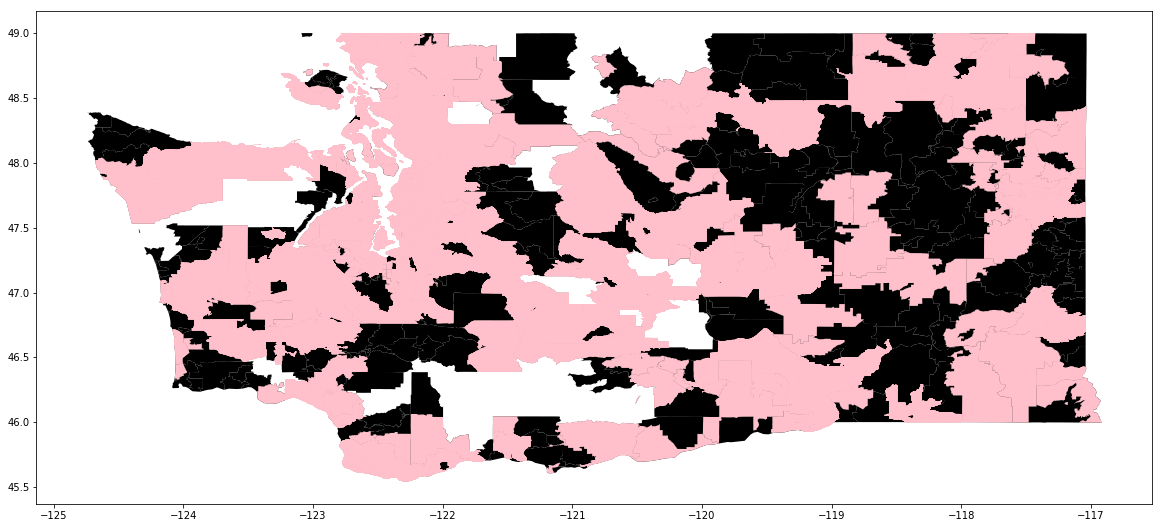

In [44]:
#draw a map to check the area that have no donation
%matplotlib inline
base = wazipMap.plot(color='black',figsize=(20,13))

contribWAmap.plot(ax=base, color='pink')

In [45]:
#check the donation rate of the data
contribWAmap['contribDen']=contribWAmap.amount/contribWAmap.POP2017

In [46]:
contribWAmap['contribDen'].describe()

count    3274.000000
mean             inf
std              NaN
min         0.000043
25%         0.001337
50%         0.003001
75%         0.008218
max              inf
Name: contribDen, dtype: float64

In [47]:
#we get a inf saying that we have some missing value in population
import numpy as np

contribWAmap[contribWAmap['contribDen']==np.inf][['contribDen']]

contribDen
1500         inf
1501         inf
1502         inf
1521         inf

In [48]:
#drop them
contribWAmap=contribWAmap[contribWAmap['contribDen']!=np.inf]

In [49]:
#now we shall see the result
contribWAmap['contribDen'].describe()

count    3270.000000
mean        0.022922
std         0.297391
min         0.000043
25%         0.001337
50%         0.002994
75%         0.008176
max        12.056909
Name: contribDen, dtype: float64

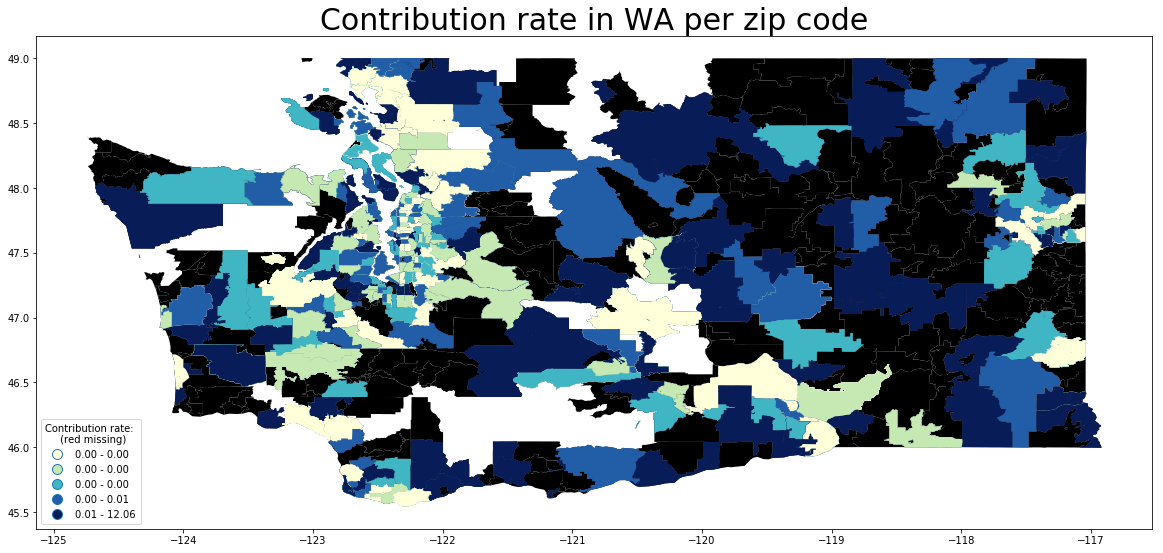

In [52]:
#a plot of the different contribution rate of different regions
import matplotlib.pyplot as plt

base = wazipMap.plot(color='black',figsize=(20,13))

topLayer=contribWAmap.plot(ax=base,column='contribDen',cmap='YlGnBu',scheme='Quantiles',k=5,legend=True,
                  legend_kwds={'loc': 3,'title':'Contribution rate: \n (red missing)'})
topLayer.set_title('Contribution rate in WA per zip code', 
                   color='black',fontdict={'fontsize':30})
leg = topLayer.get_legend()
plt.setp(leg.get_title(), multialignment='center')
plt.show()

In [54]:
#to save the map using:
#contribWAmap.to_file(driver = 'ESRI Shapefile', filename= "contribWAmap.shp")